<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Json-to-csv---merge-all-jsons-into-one-csv" data-toc-modified-id="Json-to-csv---merge-all-jsons-into-one-csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Json to csv - merge all jsons into one csv</a></span></li><li><span><a href="#Flattening-JSons---from-kaggle" data-toc-modified-id="Flattening-JSons---from-kaggle-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Flattening JSons - from kaggle</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>In a loop on real data now</a></span></li><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Regression-on-this-dataset" data-toc-modified-id="Regression-on-this-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regression on this dataset</a></span><ul class="toc-item"><li><span><a href="#With-ADAM-intead-of-RMSProp" data-toc-modified-id="With-ADAM-intead-of-RMSProp-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>With ADAM intead of RMSProp</a></span></li></ul></li></ul></li><li><span><a href="#Writing-a-flexible-hyperparameter-search-model" data-toc-modified-id="Writing-a-flexible-hyperparameter-search-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Writing a flexible hyperparameter search model</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>End bookmark</a></span></li></ul></div>

# Imports

In [6]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

In [7]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1032-state-metrics_run_71608574361561.json',
 './tracelyzer\\1180-state-metrics_run_01608574035351.json',
 './tracelyzer\\1180-state-metrics_run_01608574051355.json',
 './tracelyzer\\1180-state-metrics_run_01608574067333.json',
 './tracelyzer\\1180-state-metrics_run_01608574165431.json',
 './tracelyzer\\1180-state-metrics_run_11608574184549.json',
 './tracelyzer\\1180-state-metrics_run_21608574023465.json',
 './tracelyzer\\1180-state-metrics_run_21608574054597.json',
 './tracelyzer\\1180-state-metrics_run_21608574070489.json',
 './tracelyzer\\1180-state-metrics_run_21608574118856.json',
 './tracelyzer\\1180-state-metrics_run_21608574251821.json',
 './tracelyzer\\1180-state-metrics_run_21608574335935.json',
 './tracelyzer\\1180-state-metrics_run_31608574024960.json',
 './tracelyzer\\1180-state-metrics_run_31608574039961.json',
 './tracelyzer\\1180-state-metrics_run_31608574056560.json',
 './tracelyzer\\1180-state-metrics_run_31608574187728.json',
 './tracelyzer\\1180-sta

In [8]:
jsondf = pd.DataFrame()

In [9]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        metrics = jsonstr['metrics']
        tempdf = pd.DataFrame(columns=['name','value'])
        for i in range(len(metrics)):
        #     print(metrics[i]['name'], metrics[i]['value'])
            tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
    

In [10]:
# dataframe = pd.DataFrame.from_dict(a_json, orient="index")
testdf = pd.DataFrame.from_dict(jsonstr['metrics'][0],orient="index").T
testdf.append(pd.DataFrame.from_dict(jsonstr['metrics'][1],orient="index").T)

,name,value
0,Timestamp,559629
0,AudioHandlers,0


In [11]:
tempdf = pd.DataFrame(columns=['name','value'])
for i in range(len(metrics)):
#     print(metrics[i]['name'], metrics[i]['value'])
    tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
tempdf.T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,559629,0,6,2,236,117,0,0,351,48,...,0.00298,0.227732,0.075087,0.263133,0.65625,5.48832e+06,7.08608e+06,0,559629,559628


In [12]:
tempdf

,name,value
0,Timestamp,5.596287e+05
1,AudioHandlers,0.000000e+00
2,Documents,6.000000e+00
3,Frames,2.000000e+00
4,JSEventListeners,2.360000e+02
5,LayoutObjects,1.170000e+02
6,MediaKeySessions,0.000000e+00
7,MediaKeys,0.000000e+00
8,Nodes,3.510000e+02
9,Resources,4.800000e+01


In [13]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        print(jsonstr)
        df = pd.DataFrame({'value': jsonstr})

{'profiling': {'categories': {'scripting': 89.53999960422516, 'rendering': 37.0629997253418, 'loading': 14.728000283241272, 'painting': 6.77400016784668}, 'events': {'JS Frame': 69.34499979019165, 'Layout': 28.796000003814697, 'Parse HTML': 13.2680002450943, 'Evaluate Script': 7.041000008583069, 'Recalculate Style': 6.333999872207642, 'Run Microtasks': 5.794000029563904, 'Compile Script': 4.1570000648498535, 'Paint': 4.138000011444092, 'Composite Layers': 2.636000156402588, 'Minor GC': 2.172999858856201, 'Update Layer Tree': 1.722999930381775, 'Parse Stylesheet': 1.4600000381469727, 'Animation Frame Fired': 0.8459998369216919, 'Hit Test': 0.2099999189376831, 'XHR Ready State Change': 0.18400001525878906}, 'functions': {'Layout': 28.796000003814697, 'ParseHTML': 13.2680002450943, 'f:@5': 8.620999693870544, 'f:./node_modules/leaflet/dist/leaflet-src.js@4': 8.479999899864197, 'EvaluateScript': 7.041000008583069, 'UpdateLayoutTree': 6.333999872207642, 'RunMicrotasks': 5.794000029563904, 'v

{'profiling': {'categories': {'scripting': 99.07900059223175, 'rendering': 38.567999720573425, 'loading': 16.301999926567078, 'painting': 4.2949992418289185}, 'events': {'JS Frame': 78.9630001783371, 'Layout': 31.062999963760376, 'Parse HTML': 15.359999895095825, 'Evaluate Script': 8.454999804496765, 'Recalculate Style': 5.601000070571899, 'Run Microtasks': 4.240999937057495, 'Compile Script': 4.0680001974105835, 'Paint': 3.2929993867874146, 'Minor GC': 2.231000065803528, 'Update Layer Tree': 1.7849997282028198, 'Animation Frame Fired': 1.0760002136230469, 'Composite Layers': 1.001999855041504, 'Parse Stylesheet': 0.9420000314712524, 'Hit Test': 0.11899995803833008, 'XHR Ready State Change': 0.04500019550323486}, 'functions': {'Layout': 31.062999963760376, 'ParseHTML': 15.359999895095825, 'f:@5': 10.309000015258789, 'f:./node_modules/leaflet/dist/leaflet-src.js@4': 8.666000008583069, 'EvaluateScript': 8.454999804496765, 'UpdateLayoutTree': 5.601000070571899, 'RunMicrotasks': 4.24099993

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
df

,value
metrics,"[{'name': 'Timestamp', 'value': 559628.745575}..."
performanceTiming,"{""connectStart"":1608574381676,""navigationStart..."
profiling,{'categories': {'scripting': 94.59199941158295...
rendering,"{'firstPaint': 0.550088, 'forcedReflowEvents':..."


In [24]:
# for file in trace_files:
#     with open(file,'r') as f:
#         lines = f.read()
#         runs = lines.split("--------------------")
#         for run in runs:
#             if len(run) > 1:
#                 submetrics = run.split('\n')
#                 jsons = []
#                 for m in submetrics:
#                     if m != '':
#                         if json.loads(m):
#                             metric = json.loads(m)
#                             jsons.append(metric)
#                             with pd.read_json(metric) as tempdf:
#                                 print(tempdf)
                            
#                 jsons[0].update(jsons[1])
#                 with open(f'{file}-merged.json','a') as fw:
#                     json.dump(jsons[0],fw)
#                     print(json.dumps(jsons[0]))
#             clear_output(wait=False)

In [22]:
# len(run)

## Json to csv - merge all jsons into one csv

Life can and should be simpler

In [15]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [16]:
jsonstr.keys()

dict_keys(['profiling', 'rendering', 'metrics', 'performanceTiming'])

In [17]:
flatten_json(jsonstr['rendering'])

{'firstPaint': 0.550088,
 'forcedReflowEvents': 5,
 'fps_mean': 50.85,
 'fps_variance': 313.85,
 'fps_sd': 17.72,
 'fps_lo': 20.71,
 'fps_hi': 66.71}

In [18]:
list[flatten_json(jsonstr[g]) for g in jsonstr.keys() ] 

SyntaxError: invalid syntax (<ipython-input-18-f1573d73dadf>, line 1)

## Flattening JSons - from kaggle

In [19]:
import json 
import pandas as pd 
from pandas import json_normalize #package for flattening json in pandas df

In [20]:
#load json object
with open(trace_files[0]) as f:
    d = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
nycphil = json_normalize(d['profiling']['categories'])
nycphil.head(3)

,scripting,rendering,loading,painting
0,89.54,37.063,14.728,6.774


In [21]:
nycphil1 = json_normalize(d['profiling']['events'])
nycphil1.head(3)

,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,Compile Script,Paint,Composite Layers,Minor GC,Update Layer Tree,Parse Stylesheet,Animation Frame Fired,Hit Test,XHR Ready State Change
0,69.345,28.796,13.268,7.041,6.334,5.794,4.157,4.138,2.636,2.173,1.723,1.46,0.846,0.21,0.184


In [22]:
nycphil2 = json_normalize(d['rendering'])
nycphil2.head(3)

,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,0.554281,5,58.11,438.42,20.94,31.12,64


In [23]:
nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
nycphil3 = nycphil3.set_index('name')
# nycphil3 = nycphil3.rename(columns={"value": "0"})
nycphil3 = nycphil3.T
nycphil3.head(3)

name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,559607.368656,0.0,6.0,2.0,233.0,117.0,0.0,0.0,350.0,47.0,...,0.004137,0.210839,0.072564,0.245884,0.640625,5473964.0,7086080.0,0.0,559607.243189,559606.713992


In [24]:
nycphil4 = d['performanceTiming']
nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
nycphil4 = nycphil4.T
nycphil4.head(3)

,connectEnd,connectStart,domComplete,domContentLoadedEventEnd,domContentLoadedEventStart,domInteractive,domLoading,domainLookupEnd,domainLookupStart,fetchStart,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
value,1608574360335,1608574360334,1608574360662,1608574360559,1608574360558,1608574360558,1608574360339,1608574360030,1608574360030,1608574360029,...,1608574360662,1608574360029,0,0,1608574360335,1608574360336,1608574360335,0,0,0


In [25]:
nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape

((1, 4), (1, 15), (1, 7), (1, 35))

In [26]:
for col in nycphil1:
    nycphil[col] = nycphil1[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,Compile Script,Paint,Composite Layers,Minor GC,Update Layer Tree,Parse Stylesheet,Animation Frame Fired,Hit Test,XHR Ready State Change
0,89.54,37.063,14.728,6.774,69.345,28.796,13.268,7.041,6.334,5.794,4.157,4.138,2.636,2.173,1.723,1.46,0.846,0.21,0.184


In [27]:
for col in nycphil2:
    nycphil[col] = nycphil2[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,...,Animation Frame Fired,Hit Test,XHR Ready State Change,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,89.54,37.063,14.728,6.774,69.345,28.796,13.268,7.041,6.334,5.794,...,0.846,0.21,0.184,0.554281,5,58.11,438.42,20.94,31.12,64


In [28]:
for col in nycphil3:
#     print(nycphil3[col])
    nycphil[col] = nycphil3.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,89.54,37.063,14.728,6.774,69.345,28.796,13.268,7.041,6.334,5.794,...,0.004137,0.210839,0.072564,0.245884,0.640625,5473964.0,7086080.0,0.0,559607.243189,559606.713992


In [29]:
for col in nycphil4:
#     print(nycphil4[col])
    nycphil[col] = nycphil4.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
0,89.54,37.063,14.728,6.774,69.345,28.796,13.268,7.041,6.334,5.794,...,1608574360662,1608574360029,0,0,1608574360335,1608574360336,1608574360335,0,0,0


In [30]:
# perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
# nycphil4 = {
#         key:d[key] for key in perfkeys
#            }
# nycphil4 = pd.DataFrame(nycphil4,index={'value'})
# nycphil4.head()
# perfkeys

In [31]:
nycphil.shape

(1, 82)

In [32]:
# int(trace_file.split('\\')[1].split('-')[0])

In [33]:
# tempdf = mydf.copy()
# for i in range(tempdf.count()[0]):
#     tempdf[int(trace_file.split('\\')[1].split('-')[0])] = tempdf.iloc[i]
# #     print(tempdf.iloc[i])

## In a loop on real data now

In [35]:
import json 
import pandas as pd 
import glob
import datetime
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [42]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1032-state-metrics_run_71608574361561.json',
 './tracelyzer\\1032-state-metrics_run_71608574756512.json',
 './tracelyzer\\1032-state-metrics_run_71608574879351.json',
 './tracelyzer\\1180-state-metrics_run_01608574035351.json',
 './tracelyzer\\1180-state-metrics_run_01608574051355.json',
 './tracelyzer\\1180-state-metrics_run_01608574067333.json',
 './tracelyzer\\1180-state-metrics_run_01608574165431.json',
 './tracelyzer\\1180-state-metrics_run_11608574184549.json',
 './tracelyzer\\1180-state-metrics_run_21608574023465.json',
 './tracelyzer\\1180-state-metrics_run_21608574054597.json',
 './tracelyzer\\1180-state-metrics_run_21608574070489.json',
 './tracelyzer\\1180-state-metrics_run_21608574118856.json',
 './tracelyzer\\1180-state-metrics_run_21608574251821.json',
 './tracelyzer\\1180-state-metrics_run_21608574335935.json',
 './tracelyzer\\1180-state-metrics_run_31608574024960.json',
 './tracelyzer\\1180-state-metrics_run_31608574039961.json',
 './tracelyzer\\1180-sta

In [43]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((67, 1),
       value
 167       5
 686       1
 853       7
 997       3
 1032      3
 ...     ...
 4401      1
 4618      2
 6198      1
 6663      1
 7488      1
 
 [67 rows x 1 columns])

In [46]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,...,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,XHR Load
0,89.540000,37.063000,14.728000,6.774000,69.345000,28.796,13.268000,7.041,6.334,5.794,...,1608574360029,0,0,1608574360335,1608574360336,1608574360335,0,0,0,NaN
0,89.994000,37.224000,15.791000,4.568000,69.292000,28.848,14.438000,6.840,6.499,5.996,...,1608574754944,0,0,1608574755253,1608574755254,1608574755253,0,0,0,NaN
0,92.736000,36.268001,15.550000,4.564000,70.789000,28.237,14.519000,6.775,5.990,6.279,...,1608574877752,0,0,1608574878063,1608574878064,1608574878063,0,0,0,NaN
0,92.638000,35.771000,16.437000,3.675000,74.457000,28.759,15.242000,6.754,5.451,5.381,...,1608574033987,0,0,1608574034291,1608574034293,1608574034292,0,0,0,NaN
0,92.276000,36.636000,16.185001,3.633000,71.126000,29.450,14.601000,7.156,5.472,7.416,...,1608574049862,0,0,1608574050175,1608574050177,1608574050176,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,94.009000,36.662000,18.449000,5.367999,72.667999,28.457,17.454000,6.804,5.762,6.678,...,1608574788294,0,0,1608574788598,1608574788599,1608574788598,0,0,0,NaN
0,90.308000,37.678000,14.906000,3.815000,70.565000,30.130,13.112000,6.738,5.555,6.673,...,1608574144281,0,0,1608574144584,1608574144585,1608574144585,0,0,0,NaN
0,91.079001,37.128000,15.400999,5.343001,70.807001,29.001,14.082999,7.027,6.166,5.953,...,1608574486887,0,0,1608574487190,1608574487191,1608574487191,0,0,0,NaN
0,94.591999,41.971000,14.385000,4.673000,75.139999,32.913,13.334000,6.803,6.848,6.214,...,1608574381367,0,0,1608574381677,1608574381678,1608574381677,0,0,0,NaN


In [47]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Evaluate Script,Recalculate Style,Run Microtasks,...,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,XHR Load
0,89.540000,37.063000,14.728000,6.774000,69.345000,28.796,13.268000,7.041,6.334,5.794,...,1608574360029,0,0,1608574360335,1608574360336,1608574360335,0,0,0,NaN
0,89.994000,37.224000,15.791000,4.568000,69.292000,28.848,14.438000,6.840,6.499,5.996,...,1608574754944,0,0,1608574755253,1608574755254,1608574755253,0,0,0,NaN
0,92.736000,36.268001,15.550000,4.564000,70.789000,28.237,14.519000,6.775,5.990,6.279,...,1608574877752,0,0,1608574878063,1608574878064,1608574878063,0,0,0,NaN
0,92.638000,35.771000,16.437000,3.675000,74.457000,28.759,15.242000,6.754,5.451,5.381,...,1608574033987,0,0,1608574034291,1608574034293,1608574034292,0,0,0,NaN
0,92.276000,36.636000,16.185001,3.633000,71.126000,29.450,14.601000,7.156,5.472,7.416,...,1608574049862,0,0,1608574050175,1608574050177,1608574050176,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,94.009000,36.662000,18.449000,5.367999,72.667999,28.457,17.454000,6.804,5.762,6.678,...,1608574788294,0,0,1608574788598,1608574788599,1608574788598,0,0,0,NaN
0,90.308000,37.678000,14.906000,3.815000,70.565000,30.130,13.112000,6.738,5.555,6.673,...,1608574144281,0,0,1608574144584,1608574144585,1608574144585,0,0,0,NaN
0,91.079001,37.128000,15.400999,5.343001,70.807001,29.001,14.082999,7.027,6.166,5.953,...,1608574486887,0,0,1608574487190,1608574487191,1608574487191,0,0,0,NaN
0,94.591999,41.971000,14.385000,4.673000,75.139999,32.913,13.334000,6.803,6.848,6.214,...,1608574381367,0,0,1608574381677,1608574381678,1608574381677,0,0,0,NaN


In [48]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [49]:
mydf.to_csv('metric-dataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [50]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'21Dec2020-1128AM'

## Correlation of Columns

In [52]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Evaluate Script
☐Recalculate Style
☐Run Microtasks
☐Compile Script
☐Paint
☐Composite Layers
☐Minor GC
☐Update Layer Tree
☐Parse Stylesheet
☐Animation Frame Fired
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domC

In [53]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,350.0,5473964.0,7086080.0,89.540000,37.063000,6.774000,14.728000,0.210839,0.245884,0.640625,8.0,0.028675,0.005111,0.018845,0.081507,0.004137,0.072564
0,372.0,5795556.0,7086080.0,89.994000,37.224000,4.568000,15.791000,0.225009,0.256894,0.718750,9.0,0.028712,0.005888,0.033303,0.081018,0.003789,0.072299
0,379.0,5381788.0,9969664.0,92.736000,36.268001,4.564000,15.550000,0.229328,0.262567,0.796875,10.0,0.028040,0.005075,0.036720,0.083236,0.004111,0.072146
0,331.0,5215980.0,7086080.0,92.638000,35.771000,3.675000,16.437000,0.196721,0.233181,0.625000,7.0,0.028614,0.004331,0.007166,0.086087,0.003135,0.067388
0,332.0,5229860.0,7086080.0,92.276000,36.636000,3.633000,16.185001,0.200107,0.246828,0.609375,8.0,0.029313,0.004789,0.008406,0.083709,0.003516,0.070374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,374.0,5295920.0,9969664.0,94.009000,36.662000,5.367999,18.449000,0.235309,0.261873,0.671875,10.0,0.028333,0.005163,0.033325,0.084667,0.003529,0.080292
0,337.0,5293304.0,7086080.0,90.308000,37.678000,3.815000,14.906000,0.202604,0.236978,0.656250,9.0,0.030041,0.004919,0.011913,0.081986,0.003600,0.070145
0,357.0,5582336.0,7086080.0,91.079001,37.128000,5.343001,15.400999,0.220997,0.258388,0.671875,10.0,0.028849,0.005521,0.027095,0.083076,0.003703,0.072753
0,351.0,5488316.0,7086080.0,94.591999,41.971000,4.673000,14.385000,0.227732,0.263133,0.656250,10.0,0.032749,0.006255,0.023958,0.086703,0.002980,0.075087


In [54]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,350.0,5473964.0,89.540000,37.063000,6.774000,14.728000,0.210839,0.245884,0.640625,8.0,0.028675,0.005111,0.018845,0.081507,0.004137,0.072564,0.772495
0,372.0,5795556.0,89.994000,37.224000,4.568000,15.791000,0.225009,0.256894,0.718750,9.0,0.028712,0.005888,0.033303,0.081018,0.003789,0.072299,0.817879
0,379.0,5381788.0,92.736000,36.268001,4.564000,15.550000,0.229328,0.262567,0.796875,10.0,0.028040,0.005075,0.036720,0.083236,0.004111,0.072146,0.539816
0,331.0,5215980.0,92.638000,35.771000,3.675000,16.437000,0.196721,0.233181,0.625000,7.0,0.028614,0.004331,0.007166,0.086087,0.003135,0.067388,0.736088
0,332.0,5229860.0,92.276000,36.636000,3.633000,16.185001,0.200107,0.246828,0.609375,8.0,0.029313,0.004789,0.008406,0.083709,0.003516,0.070374,0.738047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,374.0,5295920.0,94.009000,36.662000,5.367999,18.449000,0.235309,0.261873,0.671875,10.0,0.028333,0.005163,0.033325,0.084667,0.003529,0.080292,0.531203
0,337.0,5293304.0,90.308000,37.678000,3.815000,14.906000,0.202604,0.236978,0.656250,9.0,0.030041,0.004919,0.011913,0.081986,0.003600,0.070145,0.747000
0,357.0,5582336.0,91.079001,37.128000,5.343001,15.400999,0.220997,0.258388,0.671875,10.0,0.028849,0.005521,0.027095,0.083076,0.003703,0.072753,0.787789
0,351.0,5488316.0,94.591999,41.971000,4.673000,14.385000,0.227732,0.263133,0.656250,10.0,0.032749,0.006255,0.023958,0.086703,0.002980,0.075087,0.774521


In [55]:
corrdf.corr()

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.537368,0.183712,0.155142,0.101720,-0.067015,0.616390,0.677271,0.281937,0.372940,0.069267,0.322014,0.925716,0.086370,-0.027721,0.256786,-0.378859
JSHeapUsedSize,0.537368,1.000000,0.238803,0.263065,0.083541,-0.049924,0.461614,0.496738,0.188968,0.219215,0.192308,0.337042,0.541436,0.220303,-0.009634,0.171510,0.574042
scripting,0.183712,0.238803,1.000000,0.599173,0.316397,0.392172,0.801716,0.695656,0.336317,0.159693,0.503543,0.600027,0.325059,0.984196,0.308642,0.550754,0.083393
rendering,0.155142,0.263065,0.599173,1.000000,0.248907,0.216600,0.665316,0.547285,0.252024,0.138742,0.968597,0.594222,0.266554,0.591272,0.142360,0.408756,0.139942
painting,0.101720,0.083541,0.316397,0.248907,1.000000,0.146460,0.407909,0.386092,0.228421,0.412417,0.125875,0.405208,0.194038,0.280887,0.131644,0.612187,-0.018379
loading,-0.067015,-0.049924,0.392172,0.216600,0.146460,1.000000,0.322539,0.221885,0.134976,0.013710,0.197876,0.198475,-0.010997,0.384003,0.156485,0.534830,0.009004
TaskDuration,0.616390,0.461614,0.801716,0.665316,0.407909,0.322539,1.000000,0.935649,0.434166,0.353830,0.538365,0.711653,0.767810,0.737372,0.192774,0.728939,-0.091846
ThreadTime,0.677271,0.496738,0.695656,0.547285,0.386092,0.221885,0.935649,1.000000,0.532939,0.473784,0.403030,0.699588,0.798218,0.621755,0.172213,0.680330,-0.118878
ProcessTime,0.281937,0.188968,0.336317,0.252024,0.228421,0.134976,0.434166,0.532939,1.000000,0.571869,0.149573,0.444057,0.348016,0.294736,0.106516,0.358897,-0.096234
RecalcStyleCount,0.372940,0.219215,0.159693,0.138742,0.412417,0.013710,0.353830,0.473784,0.571869,1.000000,-0.008149,0.499438,0.362786,0.108165,0.091487,0.387460,-0.155644


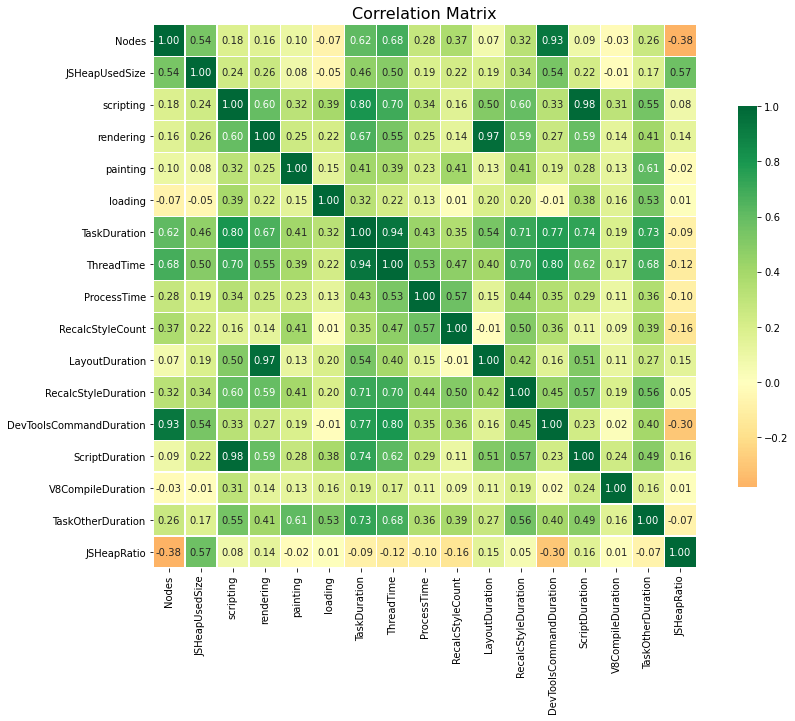

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
correlation_heatmap(corrdf) 

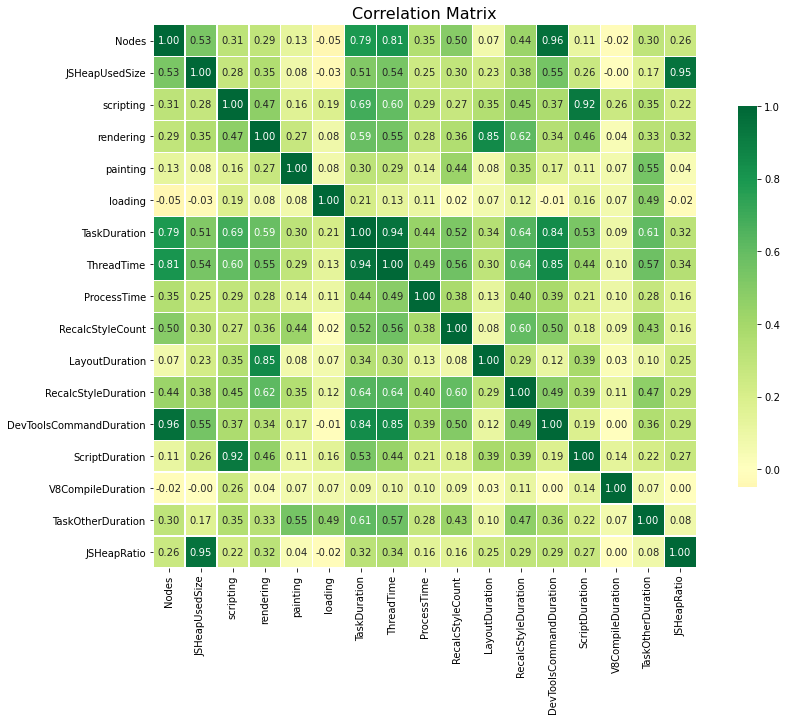

In [57]:
correlation_heatmap(corrdf,'spearman')

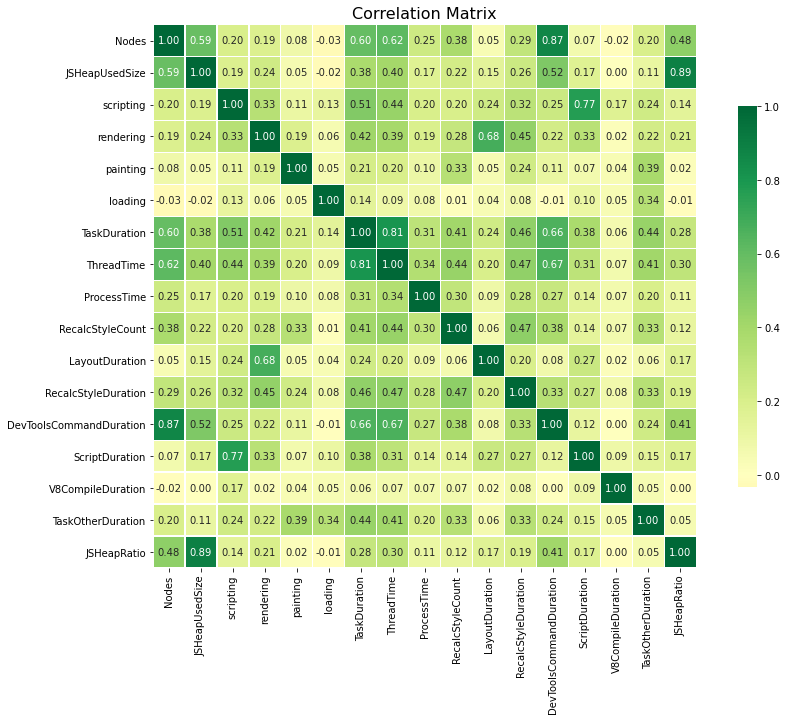

In [58]:
correlation_heatmap(corrdf,'kendall')

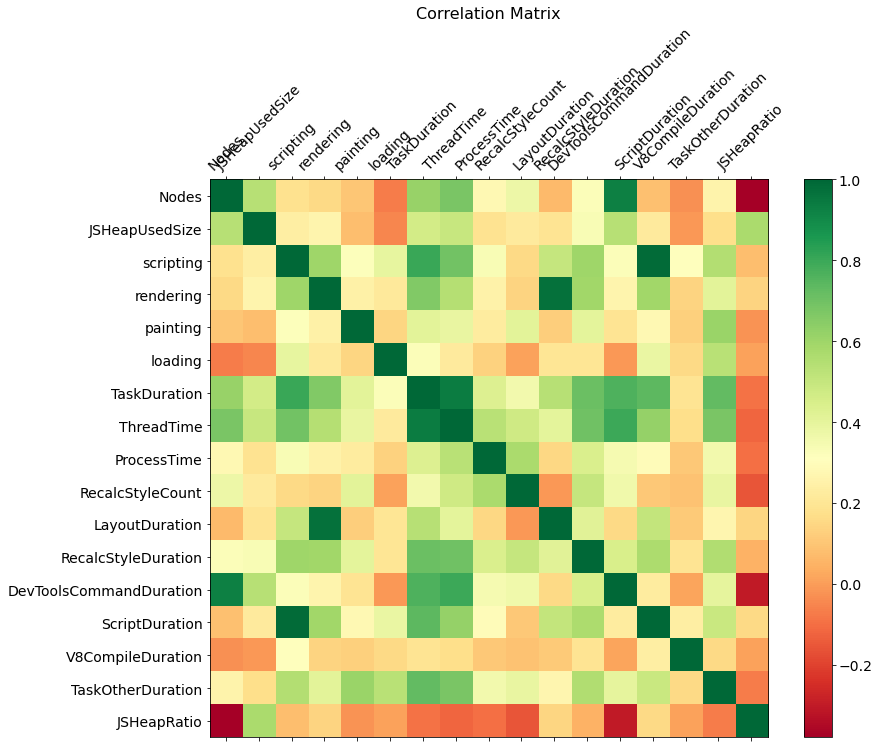

In [59]:
# cmap = ListedColormap(['r','g'])
f = plt.figure(figsize=(13, 10))
plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [60]:
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.532324,0.306176,0.289446,0.126027,-0.047349,0.788906,0.811369,0.349883,0.498166,0.073259,0.438376,0.964045,0.112999,-0.022204,0.299571,0.263341
JSHeapUsedSize,0.532324,1.000000,0.283106,0.354057,0.081027,-0.032532,0.513740,0.537938,0.246343,0.295828,0.225997,0.384342,0.548313,0.262411,-0.000482,0.166367,0.946491
scripting,0.306176,0.283106,1.000000,0.468938,0.157412,0.189053,0.691302,0.601439,0.288266,0.269555,0.349259,0.446407,0.373998,0.922811,0.257013,0.347626,0.222046
rendering,0.289446,0.354057,0.468938,1.000000,0.274397,0.084587,0.586814,0.552481,0.278731,0.360781,0.850875,0.617965,0.339017,0.458294,0.037541,0.325121,0.317850
painting,0.126027,0.081027,0.157412,0.274397,1.000000,0.077129,0.304876,0.292894,0.144354,0.436479,0.076938,0.347606,0.169337,0.107633,0.065791,0.548177,0.037529
loading,-0.047349,-0.032532,0.189053,0.084587,0.077129,1.000000,0.213377,0.134072,0.110767,0.016059,0.067284,0.119831,-0.010538,0.156769,0.070300,0.489158,-0.021711
TaskDuration,0.788906,0.513740,0.691302,0.586814,0.304876,0.213377,1.000000,0.944941,0.441376,0.524164,0.344452,0.644086,0.842524,0.531783,0.094545,0.609177,0.317260
ThreadTime,0.811369,0.537938,0.601439,0.552481,0.292894,0.134072,0.944941,1.000000,0.485089,0.564571,0.297008,0.642527,0.851324,0.439813,0.103324,0.571980,0.337681
ProcessTime,0.349883,0.246343,0.288266,0.278731,0.144354,0.110767,0.441376,0.485089,1.000000,0.382210,0.132134,0.398823,0.385813,0.208378,0.099796,0.283396,0.155411
RecalcStyleCount,0.498166,0.295828,0.269555,0.360781,0.436479,0.016059,0.524164,0.564571,0.382210,1.000000,0.081913,0.601995,0.501222,0.181099,0.091699,0.434727,0.156354


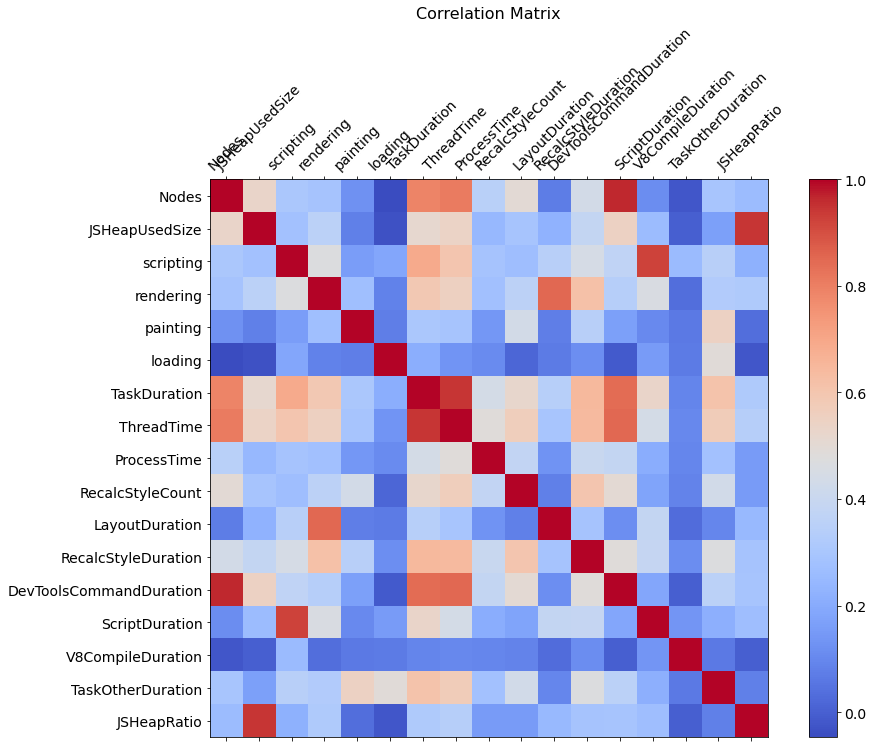

In [61]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Regression on this dataset

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [65]:
model_data = corrdf.drop(columns=['loading'])#['loading','Documents','Resources']
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,350.0,5473964.0,89.540000,37.063000,6.774000,0.210839,0.245884,0.640625,8.0,0.028675,0.005111,0.018845,0.081507,0.004137,0.072564,0.772495
0,372.0,5795556.0,89.994000,37.224000,4.568000,0.225009,0.256894,0.718750,9.0,0.028712,0.005888,0.033303,0.081018,0.003789,0.072299,0.817879
0,379.0,5381788.0,92.736000,36.268001,4.564000,0.229328,0.262567,0.796875,10.0,0.028040,0.005075,0.036720,0.083236,0.004111,0.072146,0.539816
0,331.0,5215980.0,92.638000,35.771000,3.675000,0.196721,0.233181,0.625000,7.0,0.028614,0.004331,0.007166,0.086087,0.003135,0.067388,0.736088
0,332.0,5229860.0,92.276000,36.636000,3.633000,0.200107,0.246828,0.609375,8.0,0.029313,0.004789,0.008406,0.083709,0.003516,0.070374,0.738047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,374.0,5295920.0,94.009000,36.662000,5.367999,0.235309,0.261873,0.671875,10.0,0.028333,0.005163,0.033325,0.084667,0.003529,0.080292,0.531203
0,337.0,5293304.0,90.308000,37.678000,3.815000,0.202604,0.236978,0.656250,9.0,0.030041,0.004919,0.011913,0.081986,0.003600,0.070145,0.747000
0,357.0,5582336.0,91.079001,37.128000,5.343001,0.220997,0.258388,0.671875,10.0,0.028849,0.005521,0.027095,0.083076,0.003703,0.072753,0.787789
0,351.0,5488316.0,94.591999,41.971000,4.673000,0.227732,0.263133,0.656250,10.0,0.032749,0.006255,0.023958,0.086703,0.002980,0.075087,0.774521


In [66]:
train_dataset = model_data.iloc[:400]
test_dataset = model_data.iloc[400:]

In [67]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,400.0,3.534450e+02,14.588662,3.300000e+02,3.410000e+02,3.530000e+02,3.660000e+02,3.790000e+02
JSHeapUsedSize,400.0,5.460876e+06,169444.402372,5.186428e+06,5.325002e+06,5.430414e+06,5.593514e+06,5.796404e+06
scripting,400.0,9.307429e+01,6.835377,8.490600e+01,8.944400e+01,9.122250e+01,9.463625e+01,1.512250e+02
rendering,400.0,3.843257e+01,3.573986,3.499700e+01,3.656675e+01,3.756250e+01,3.889300e+01,7.668600e+01
painting,400.0,4.358158e+00,0.575860,3.214001e+00,3.966500e+00,4.266500e+00,4.624750e+00,7.360000e+00
TaskDuration,400.0,2.191465e-01,0.017416,1.884630e-01,2.058673e-01,2.189290e-01,2.283913e-01,3.292490e-01
ThreadTime,400.0,2.517239e-01,0.014504,2.068920e-01,2.406507e-01,2.510285e-01,2.609765e-01,3.300410e-01
ProcessTime,400.0,6.487500e-01,0.080770,4.843750e-01,5.937500e-01,6.406250e-01,6.875000e-01,1.468750e+00
RecalcStyleCount,400.0,9.235000e+00,1.429996,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,2.400000e+01
LayoutDuration,400.0,3.020789e-02,0.003112,2.779500e-02,2.883750e-02,2.933550e-02,3.033225e-02,6.825300e-02


In [68]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [69]:
len(train_dataset),len(test_dataset)

(400, 96)

In [72]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [73]:
normed_train_data.head()

,DevToolsCommandDuration,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,V8CompileDuration,painting,rendering,scripting
0,-0.398963,0.370617,0.077243,-0.492527,-0.100594,-0.863639,-0.143650,-0.564144,-0.477015,0.095576,-0.402652,1.421486,4.195189,-0.383205,-0.517059
0,1.018546,0.906669,1.975164,-0.480639,0.866659,-0.164336,1.032305,-0.638096,0.336619,0.038684,0.356471,0.688229,0.364398,-0.338157,-0.450639
0,1.353559,-2.377688,-0.466746,-0.696557,1.833913,0.534967,-0.198134,-0.302662,0.584614,0.005836,0.747616,1.366703,0.357452,-0.605645,-0.049491
0,-1.544009,-0.059408,-1.445286,-0.512127,-0.294045,-1.562942,-1.324144,0.128502,-1.287663,-1.015648,-1.278505,-0.689788,-1.186325,-0.744706,-0.063828
0,-1.422436,-0.036272,-1.363371,-0.287533,-0.487496,-0.863639,-0.630982,-0.231129,-1.093241,-0.374591,-0.337565,0.113002,-1.259259,-0.502679,-0.116788


In [74]:
model = reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [75]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 17ms/step - loss: 123424.5859 - mae: 351.0260 - mse: 123424.5859 - val_loss: 128364.1641 - val_mae: 358.0083 - val_mse: 128364.1641
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 122590.8984 - mae: 349.8360 - mse: 122590.8984 - val_loss: 127567.8516 - val_mae: 356.8954 - val_mse: 127567.8516
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 121709.3359 - mae: 348.5738 - mse: 121709.3359 - val_loss: 126629.9766 - val_mae: 355.5796 - val_mse: 126629.9766
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 120688.3281 - mae: 347.1026 - mse: 120688.3281 - val_loss: 125561.8281 - val_mae: 354.0707 - val_mse: 125561.8281
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 119473.5859 - mae: 345.3347 - mse: 119473.5859 - val_loss: 124279.8594 - val_mae: 352.2474 - val_mse: 124279.8594
Epoch 6/1000
10/10 [==============================] - 0s 4m

Epoch 45/1000
10/10 [==============================] - 0s 4ms/step - loss: 21259.8496 - mae: 123.8062 - mse: 21259.8496 - val_loss: 18380.4688 - val_mae: 125.0184 - val_mse: 18380.4688
Epoch 46/1000
10/10 [==============================] - 0s 4ms/step - loss: 20281.4395 - mae: 120.4679 - mse: 20281.4395 - val_loss: 17300.5840 - val_mae: 120.9696 - val_mse: 17300.5840
Epoch 47/1000
10/10 [==============================] - 0s 4ms/step - loss: 19361.2539 - mae: 117.0955 - mse: 19361.2539 - val_loss: 16294.9512 - val_mae: 117.0517 - val_mse: 16294.9512
Epoch 48/1000
10/10 [==============================] - 0s 4ms/step - loss: 18410.8555 - mae: 114.1518 - mse: 18410.8555 - val_loss: 15378.5801 - val_mae: 113.3219 - val_mse: 15378.5801
Epoch 49/1000
10/10 [==============================] - 0s 5ms/step - loss: 17539.1914 - mae: 111.1771 - mse: 17539.1914 - val_loss: 14404.5996 - val_mae: 109.0534 - val_mse: 14404.5996
Epoch 50/1000
10/10 [==============================] - 0s 4ms/step - loss: 

10/10 [==============================] - 0s 4ms/step - loss: 1101.4924 - mae: 25.0108 - mse: 1101.4924 - val_loss: 769.5035 - val_mae: 23.1634 - val_mse: 769.5035
Epoch 91/1000
10/10 [==============================] - 0s 4ms/step - loss: 1040.4076 - mae: 24.1356 - mse: 1040.4076 - val_loss: 732.3536 - val_mae: 22.5483 - val_mse: 732.3536
Epoch 92/1000
10/10 [==============================] - 0s 4ms/step - loss: 973.7441 - mae: 23.3114 - mse: 973.7441 - val_loss: 709.2233 - val_mae: 22.1447 - val_mse: 709.2233
Epoch 93/1000
10/10 [==============================] - 0s 4ms/step - loss: 923.9235 - mae: 22.9653 - mse: 923.9235 - val_loss: 628.6509 - val_mae: 20.8798 - val_mse: 628.6509
Epoch 94/1000
10/10 [==============================] - 0s 4ms/step - loss: 868.3209 - mae: 22.1793 - mse: 868.3209 - val_loss: 579.6246 - val_mae: 20.0124 - val_mse: 579.6246
Epoch 95/1000
10/10 [==============================] - 0s 4ms/step - loss: 821.0446 - mae: 21.4693 - mse: 821.0446 - val_loss: 544.5709

Epoch 137/1000
10/10 [==============================] - 0s 4ms/step - loss: 113.9763 - mae: 7.7648 - mse: 113.9763 - val_loss: 87.9644 - val_mae: 7.4439 - val_mse: 87.9644
Epoch 138/1000
10/10 [==============================] - 0s 4ms/step - loss: 107.7058 - mae: 7.4222 - mse: 107.7058 - val_loss: 92.8319 - val_mae: 7.5657 - val_mse: 92.8319
Epoch 139/1000
10/10 [==============================] - 0s 4ms/step - loss: 101.5453 - mae: 7.3565 - mse: 101.5453 - val_loss: 87.6883 - val_mae: 7.3107 - val_mse: 87.6883
Epoch 140/1000
10/10 [==============================] - 0s 4ms/step - loss: 96.1468 - mae: 7.0294 - mse: 96.1468 - val_loss: 90.6120 - val_mae: 7.4101 - val_mse: 90.6120
Epoch 141/1000
10/10 [==============================] - 0s 4ms/step - loss: 99.7693 - mae: 7.1255 - mse: 99.7693 - val_loss: 89.8847 - val_mae: 7.3770 - val_mse: 89.8847
Epoch 142/1000
10/10 [==============================] - 0s 4ms/step - loss: 91.2418 - mae: 7.0369 - mse: 91.2418 - val_loss: 77.8690 - val_mae: 

In [76]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

3/3 - 0s - loss: 191.1523 - mae: 7.5748 - mse: 191.1523
Testing set Mean Abs Error:  7.57 Nodes


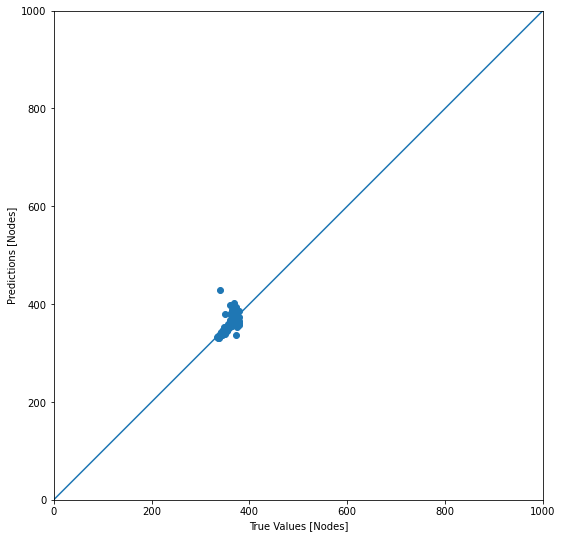

In [81]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [82]:
test_labels

0    343.0
0    344.0
0    350.0
0    368.0
0    374.0
     ...  
0    374.0
0    337.0
0    357.0
0    351.0
0    367.0
Name: Nodes, Length: 96, dtype: float64

In [83]:
test_predictions

array([337.12393, 340.74646, 380.33832, 368.0244 , 377.15552, 342.99878,
       358.69327, 366.6598 , 353.39474, 360.2702 , 355.35397, 341.7229 ,
       349.49695, 350.6631 , 379.98114, 335.4691 , 339.81122, 346.04428,
       364.69678, 370.4326 , 382.1374 , 375.89508, 385.36777, 360.4139 ,
       397.97086, 360.66107, 347.1553 , 355.09314, 370.35278, 372.63336,
       365.70508, 357.09976, 356.38678, 362.59305, 353.2746 , 357.17307,
       372.96667, 367.17355, 361.78604, 348.78757, 429.01178, 359.8363 ,
       382.35114, 393.7633 , 346.8054 , 361.4496 , 372.37924, 347.09363,
       368.19208, 334.41364, 353.4316 , 376.19647, 371.30856, 335.904  ,
       343.05484, 363.4813 , 345.9573 , 352.8423 , 360.22336, 385.56348,
       356.3652 , 366.7896 , 350.59067, 388.68567, 347.35406, 349.15372,
       377.6479 , 359.89587, 346.8839 , 364.87442, 344.91177, 403.09958,
       388.54736, 363.9103 , 367.18265, 372.887  , 344.7029 , 336.72427,
       368.99194, 372.83282, 382.4728 , 365.19052, 

### With ADAM intead of RMSProp

In [84]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_adam_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [85]:
model = reg_adam_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [86]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 13ms/step - loss: 121231.0859 - mae: 347.8724 - mse: 121231.0859 - val_loss: 121452.7891 - val_mae: 348.1856 - val_mse: 121452.7891
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 104953.1250 - mae: 322.8362 - mse: 104953.1250 - val_loss: 95207.7266 - val_mae: 306.8228 - val_mse: 95207.7266
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 67999.3281 - mae: 250.3977 - mse: 67999.3281 - val_loss: 48155.7578 - val_mae: 208.6478 - val_mse: 48155.7578
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 35961.6680 - mae: 161.4534 - mse: 35961.6680 - val_loss: 25002.1152 - val_mae: 139.9382 - val_mse: 25002.1152
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 26545.0312 - mae: 133.7995 - mse: 26545.0312 - val_loss: 17445.0371 - val_mae: 122.1309 - val_mse: 17445.0371
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss:

10/10 [==============================] - 0s 3ms/step - loss: 97.0841 - mae: 6.9833 - mse: 97.0841 - val_loss: 87.3291 - val_mae: 7.4232 - val_mse: 87.3291
Epoch 48/1000
10/10 [==============================] - 0s 4ms/step - loss: 88.0856 - mae: 7.1955 - mse: 88.0856 - val_loss: 92.2128 - val_mae: 7.6479 - val_mse: 92.2128
Epoch 49/1000
10/10 [==============================] - 0s 4ms/step - loss: 77.5980 - mae: 6.6825 - mse: 77.5980 - val_loss: 80.9952 - val_mae: 7.0764 - val_mse: 80.9952
Epoch 50/1000
10/10 [==============================] - 0s 4ms/step - loss: 72.0194 - mae: 6.1930 - mse: 72.0194 - val_loss: 81.0707 - val_mae: 7.0761 - val_mse: 81.0707
Epoch 51/1000
10/10 [==============================] - 0s 4ms/step - loss: 71.9911 - mae: 6.2691 - mse: 71.9911 - val_loss: 72.0259 - val_mae: 6.6175 - val_mse: 72.0259
Epoch 52/1000
10/10 [==============================] - 0s 4ms/step - loss: 62.8925 - mae: 6.0021 - mse: 62.8925 - val_loss: 75.1372 - val_mae: 6.5473 - val_mse: 75.1372


10/10 [==============================] - 0s 4ms/step - loss: 16.1225 - mae: 2.6739 - mse: 16.1225 - val_loss: 32.6005 - val_mae: 3.6826 - val_mse: 32.6005
Epoch 96/1000
10/10 [==============================] - 0s 4ms/step - loss: 16.5321 - mae: 3.0618 - mse: 16.5321 - val_loss: 34.1659 - val_mae: 4.3493 - val_mse: 34.1659
Epoch 97/1000
10/10 [==============================] - 0s 3ms/step - loss: 15.8647 - mae: 2.9067 - mse: 15.8647 - val_loss: 38.2079 - val_mae: 4.2353 - val_mse: 38.2079
Epoch 98/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.4335 - mae: 2.7612 - mse: 14.4335 - val_loss: 30.8089 - val_mae: 3.7615 - val_mse: 30.8089
Epoch 99/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.0356 - mae: 2.6298 - mse: 14.0356 - val_loss: 31.7764 - val_mae: 3.5485 - val_mse: 31.7764
Epoch 100/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.6230 - mae: 2.4864 - mse: 12.6230 - val_loss: 29.0768 - val_mae: 3.5921 - val_mse: 29.0768

Epoch 144/1000
10/10 [==============================] - 0s 4ms/step - loss: 6.6972 - mae: 1.6951 - mse: 6.6972 - val_loss: 19.3128 - val_mae: 2.5485 - val_mse: 19.3128
Epoch 145/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.1453 - mae: 1.5510 - mse: 5.1453 - val_loss: 18.7116 - val_mae: 2.4753 - val_mse: 18.7116
Epoch 146/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.2502 - mae: 1.5722 - mse: 5.2502 - val_loss: 18.9342 - val_mae: 2.5100 - val_mse: 18.9342
Epoch 147/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.9644 - mae: 1.5938 - mse: 4.9644 - val_loss: 17.8273 - val_mae: 2.2983 - val_mse: 17.8273
Epoch 148/1000
10/10 [==============================] - 0s 4ms/step - loss: 6.1294 - mae: 1.6865 - mse: 6.1294 - val_loss: 18.2439 - val_mae: 2.4591 - val_mse: 18.2439
Epoch 149/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.4913 - mae: 1.6707 - mse: 5.4913 - val_loss: 18.4846 - val_mae: 2.3281 - val_mse: 

In [87]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

3/3 - 0s - loss: 99.2416 - mae: 3.7880 - mse: 99.2416
Testing set Mean Abs Error:  3.79 Nodes


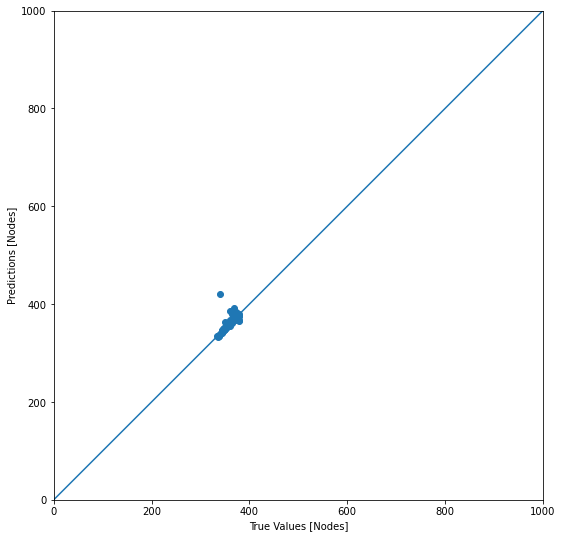

In [89]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Writing a flexible hyperparameter search model

In [393]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(optimizer='Adam',activation='relu'):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [394]:
model = flex_reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [395]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,batch_size=128,
  callbacks=[early_stop]
)

Epoch 1/1000
3/3 [==============================] - 0s 35ms/step - loss: 697937536.0000 - mae: 23567.7539 - mse: 697937536.0000 - val_loss: 2068981760.0000 - val_mae: 42009.2578 - val_mse: 2068981760.0000
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 697873216.0000 - mae: 23566.1211 - mse: 697873216.0000 - val_loss: 2068595968.0000 - val_mae: 42004.7695 - val_mse: 2068595968.0000
Epoch 3/1000
3/3 [==============================] - 0s 8ms/step - loss: 697770112.0000 - mae: 23563.5293 - mse: 697770112.0000 - val_loss: 2067934208.0000 - val_mae: 41997.1055 - val_mse: 2067934208.0000
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 697606016.0000 - mae: 23559.3438 - mse: 697606016.0000 - val_loss: 2066888704.0000 - val_mae: 41985.0000 - val_mse: 2066888704.0000
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 697348992.0000 - mae: 23552.8730 - mse: 697348992.0000 - val_loss: 2065330432.0000 - val_mae: 41966.9609 - val

In [396]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 179142013296968158284873728.0000 - mae: 13228499271680.0000 - mse: 179142013296968158284873728.0000
Testing set Mean Abs Error: 13228499271680.00 Nodes


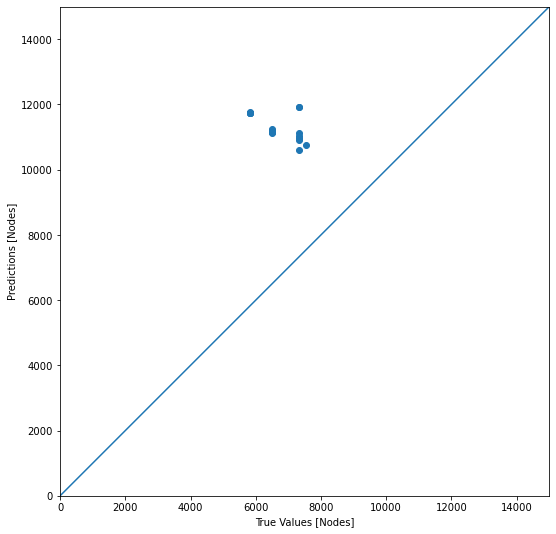

In [408]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [402]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,5))
sample_test

array([[-0.42030595, -0.37776802, -0.97555406, -0.98704312, -0.95867842]])

In [403]:
normed_test_data.shape, sample_test.shape

((108, 5), (1, 5))

In [404]:
model.predict(sample_test), train_labels.iloc[50]

(array([[9239.249]], dtype=float32), 13856.0)

# End bookmark